<a href="https://colab.research.google.com/github/AmrMomtaz/Speech-Emotion-Recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speech Emotion Recognition (SER)

## Installation and importing the data 

In this section all the project dependencies will be installed and we will import the data. You can find the dataset <a href="https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en">here</a>
You **MUST** import your kaggle API token to clone the data.

In [1]:
# Cloning data
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en
! unzip /content/speech-emotion-recognition-en.zip
! rm /content/speech-emotion-recognition-en.zip
! rm -rf /content/Ravdess
! rm -rf /content/Savee
! rm -rf /content/Tess

# Importing libraries
import numpy as np
import librosa, librosa.display
from IPython.core.display import display
import matplotlib.pyplot as plt
import IPython

# Defining constants
SR = 22050
FIG_SIZE = (9,6)

Streaming output truncated to the last 5000 lines.
  inflating: Crema/1088_IWW_FEA_XX.wav  
  inflating: Crema/1088_IWW_HAP_XX.wav  
  inflating: Crema/1088_IWW_NEU_XX.wav  
  inflating: Crema/1088_IWW_SAD_XX.wav  
  inflating: Crema/1088_MTI_ANG_XX.wav  
  inflating: Crema/1088_MTI_DIS_XX.wav  
  inflating: Crema/1088_MTI_FEA_XX.wav  
  inflating: Crema/1088_MTI_HAP_XX.wav  
  inflating: Crema/1088_MTI_NEU_XX.wav  
  inflating: Crema/1088_MTI_SAD_XX.wav  
  inflating: Crema/1088_TAI_ANG_XX.wav  
  inflating: Crema/1088_TAI_DIS_XX.wav  
  inflating: Crema/1088_TAI_FEA_XX.wav  
  inflating: Crema/1088_TAI_HAP_XX.wav  
  inflating: Crema/1088_TAI_NEU_XX.wav  
  inflating: Crema/1088_TAI_SAD_XX.wav  
  inflating: Crema/1088_TIE_ANG_XX.wav  
  inflating: Crema/1088_TIE_DIS_XX.wav  
  inflating: Crema/1088_TIE_FEA_XX.wav  
  inflating: Crema/1088_TIE_HAP_XX.wav  
  inflating: Crema/1088_TIE_NEU_XX.wav  
  inflating: Crema/1088_TIE_SAD_XX.wav  
  inflating: Crema/1088_TSI_ANG_XX.wav  
  infl

In [2]:
# getting audio paths
crema_files = !ls /content/Crema
sad_audio_path,angry_audio_path,disgust_audio_path,fear_audio_path,\
happy_audio_path,neutral_audio_path = list(),list(),list(),list(),list(),list()
mood_dict = {'SAD':sad_audio_path,'ANG':angry_audio_path,'DIS':disgust_audio_path
             ,'FEA':fear_audio_path,'HAP':happy_audio_path,'NEU':neutral_audio_path}
for line in crema_files:
  for audio in line.split():
    mood_dict[audio.split('_')[2]].append('/content/Crema/'+audio)
x = ['SAD','ANGGRY','DISGUST','FEAR','HAPPY','NEUTRAL']
y = [len(sad_audio_path),len(angry_audio_path),len(disgust_audio_path),
     len(fear_audio_path),len(happy_audio_path),len(neutral_audio_path)]

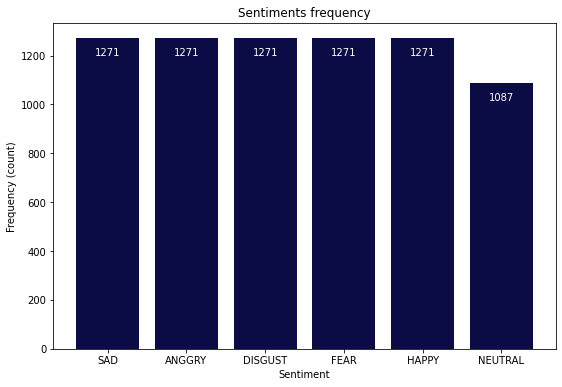

In [12]:
#@title
plt.figure(figsize=FIG_SIZE)
plt.bar(x,y,color = (0.043,0.043,0.27))
plt.text(plt.xticks()[0][0],len(sad_audio_path)-70,len(sad_audio_path), ha = 'center' , color = 'white')
plt.text(plt.xticks()[0][1],len(angry_audio_path)-70,len(angry_audio_path), ha = 'center' , color = 'white')
plt.text(plt.xticks()[0][2],len(disgust_audio_path)-70,len(disgust_audio_path), ha = 'center' , color = 'white')
plt.text(plt.xticks()[0][3],len(fear_audio_path)-70,len(fear_audio_path), ha = 'center' , color = 'white')
plt.text(plt.xticks()[0][4],len(happy_audio_path)-70,len(happy_audio_path), ha = 'center' , color = 'white')
plt.text(plt.xticks()[0][5],len(neutral_audio_path)-70,len(neutral_audio_path), ha = 'center' , color = 'white')
plt.xlabel('Sentiment')
plt.ylabel('Frequency (count)')
plt.title('Sentiments frequency');

In [3]:
# Function which plots waveform and loads the audio for listening
def visualize_audio(audio_path):
  signal, sample_rate = librosa.load(audio_path, sr=SR)
  plt.figure(figsize=FIG_SIZE)
  librosa.display.waveplot(signal, sample_rate, alpha=0.7)
  plt.xlabel("Time (s)")
  plt.ylabel("Amplitude")
  plt.title("Waveform")
  plt.show();
  print('\n',end='')
  display(IPython.display.Audio(audio_path))

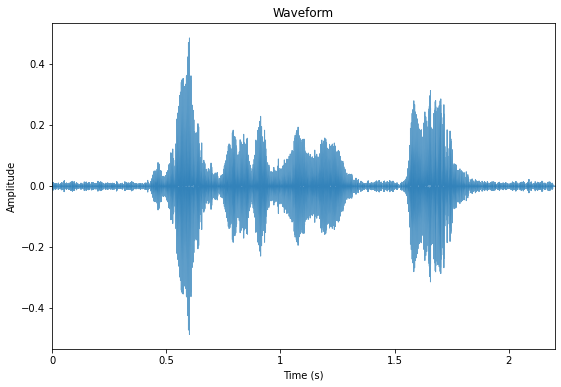

In [4]:
visualize_audio(angry_audio_path[640])

## Pre-processing data

In this section, We will preprocess and split the data.